In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from env import user,password,host
import os
import wrangle
import explore
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

n/a

# 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.



In [2]:
# get data
df = wrangle.get_zillow_data()

csv file found and loaded



In [3]:
# prep
df = wrangle.wrangle_zillow(df)

In [4]:
# split
train, validate, test = wrangle.split_data(df)


train -> (1219902, 7), 60.0%
validate -> (406635, 7),20.0%
test -> (406635, 7), 20.0%


# 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



In [5]:
def plot_variable_pairs(df):
    sns.set(style="ticks", color_codes=True)
    sns.pairplot(df, kind='reg')

In [6]:
sm_df = train.sample(n=10000,random_state=123)

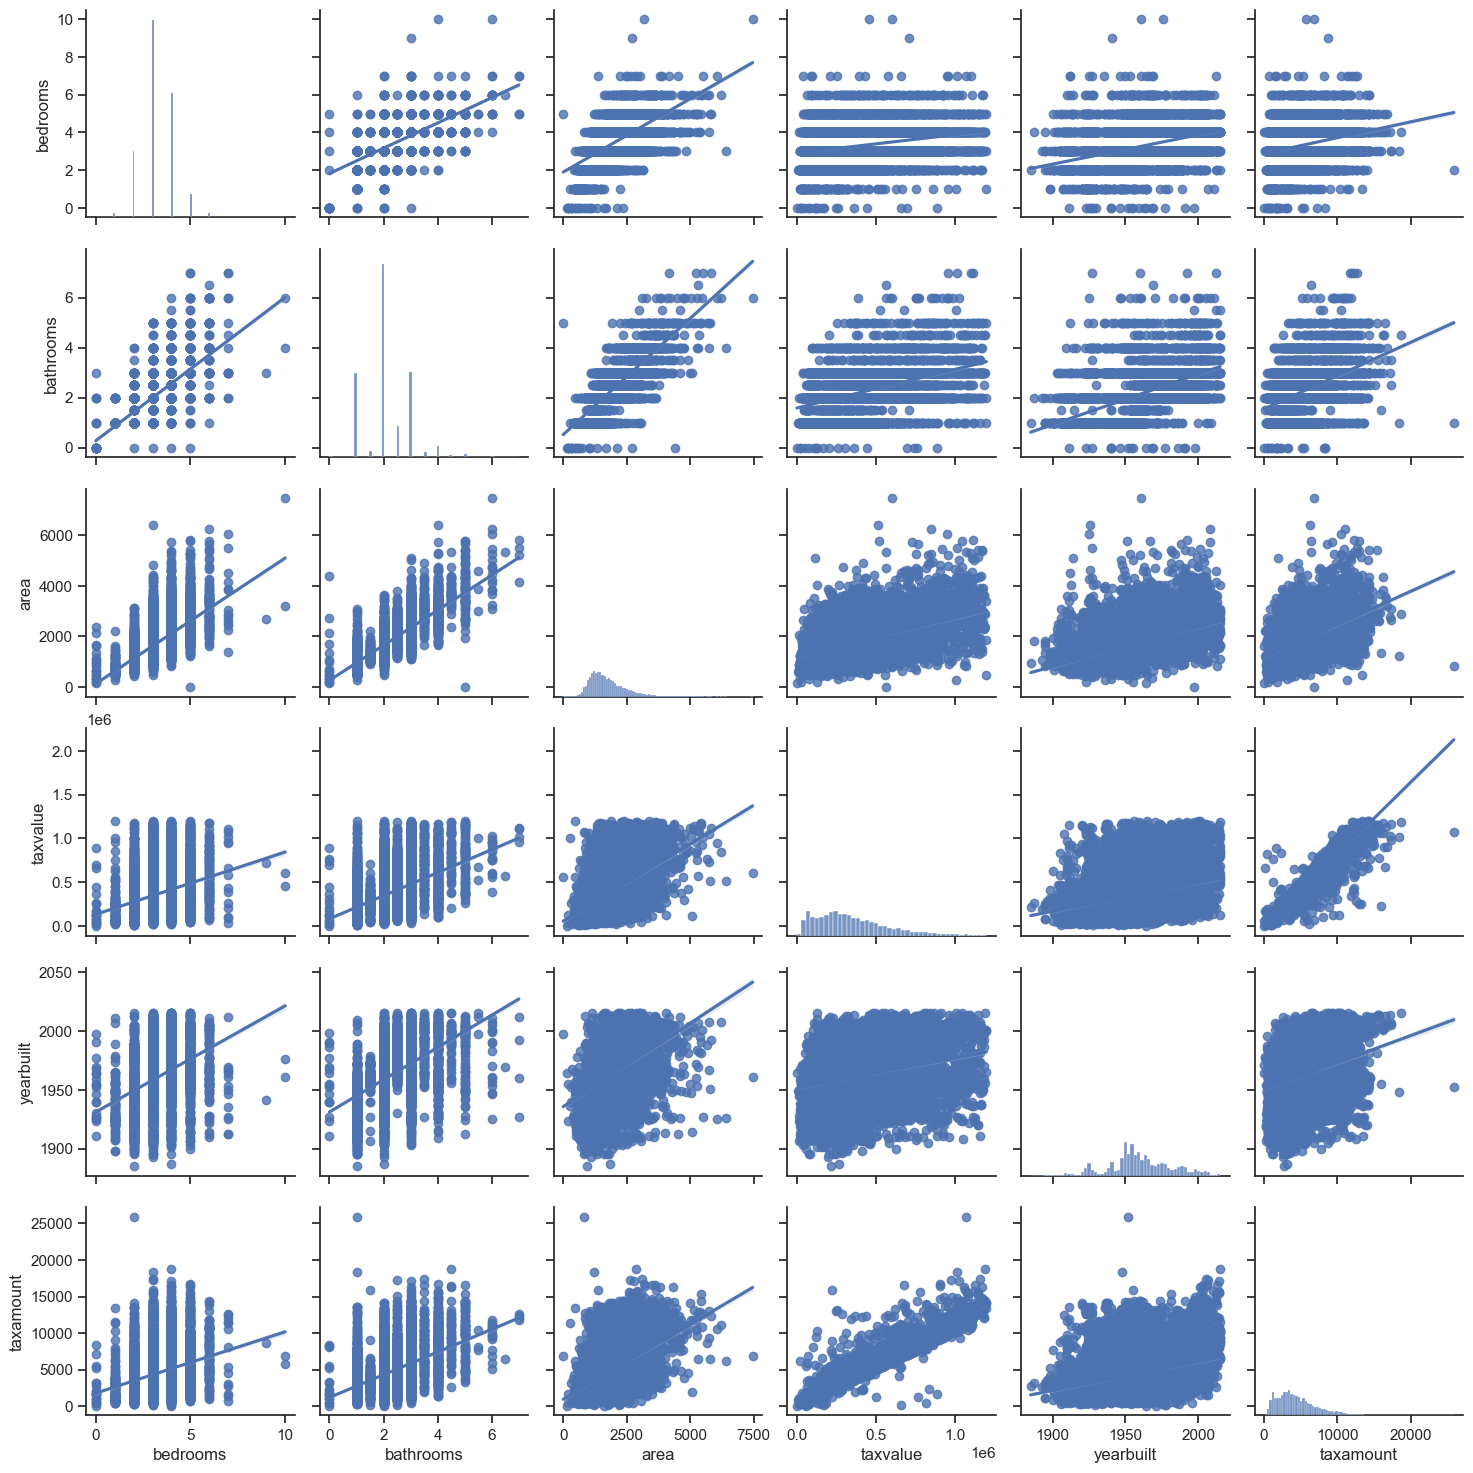

In [7]:
plot_variable_pairs(sm_df)

# 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.
 


In [8]:
def plot_categorical_and_continuous_vars(df, cat_var, cont_var):
    # plot 1: boxplot
    fig, axs = plt.subplots(figsize=(10,6))
    sns.boxplot(x=cat_var, y=cont_var, data=df)
    axs.set_title(f"{cat_var} vs {cont_var}")
    axs.set_xlabel(cat_var)
    axs.set_ylabel(cont_var)
    plt.show()
    
    # plot 2: violinplot
    fig, axs = plt.subplots(figsize=(10,6))
    sns.violinplot(x=cat_var, y=cont_var, data=df)
    axs.set_title(f"{cat_var} vs {cont_var}")
    axs.set_xlabel(cat_var)
    axs.set_ylabel(cont_var)
    plt.show()
    
    # plot 3: swarmplot
    fig, axs = plt.subplots(figsize=(10,6))
    sns.swarmplot(x=cat_var, y=cont_var, data=df)
    axs.set_title(f"{cat_var} vs {cont_var}")
    axs.set_xlabel(cat_var)
    axs.set_ylabel(cont_var)
    plt.show()


In [9]:
sm_df

bedrooms  bathrooms  area  taxvalue  yearbuilt  taxamount   county
662794          2        1.0   980    522302       1955    5991.50       LA
1459121         3        2.0  1600    297116       1938    3645.70       LA
1082642         2        1.0  1040     67042       1964    1469.16       LA
59324           3        2.0  1588    422021       1924    5161.67       LA
2013330         3        2.0  1447    384362       1975    4504.42  Ventura
...           ...        ...   ...       ...        ...        ...      ...
36136           3        2.0  1564     37639       1948     801.71       LA
1835006         3        2.0  1112     41482       1950    1020.22       LA
215560          3        3.0  2563   1035884       1974   10906.08  Ventura
909015          3        2.0  1814    114104       1942    1732.85       LA
2702            3        2.0  1272    323032       1955    4267.85       LA

[10000 rows x 7 columns]

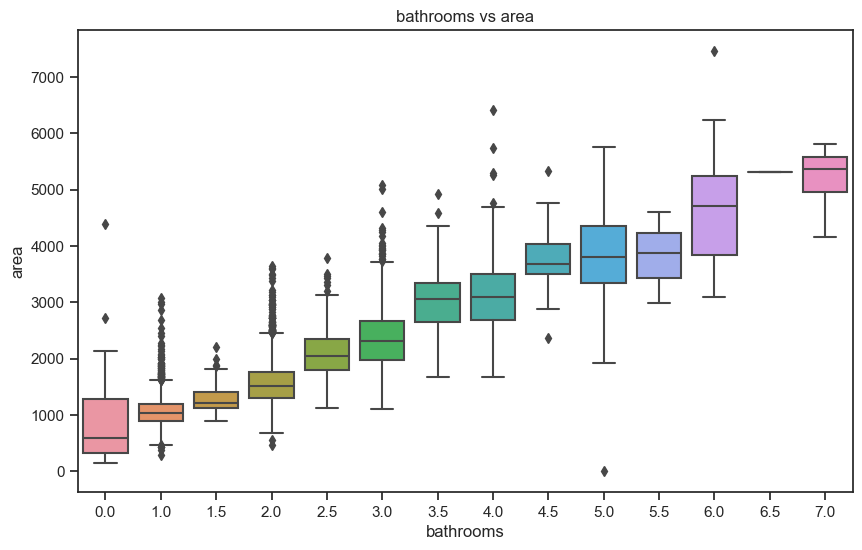

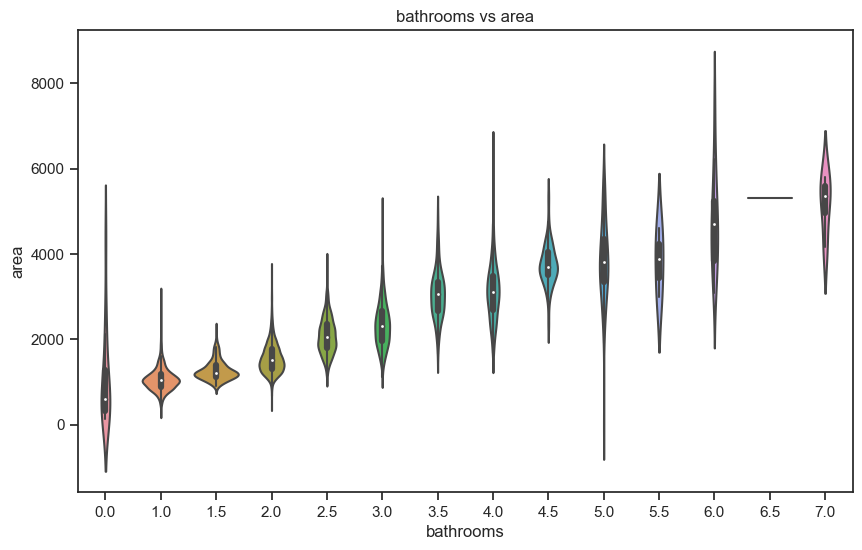

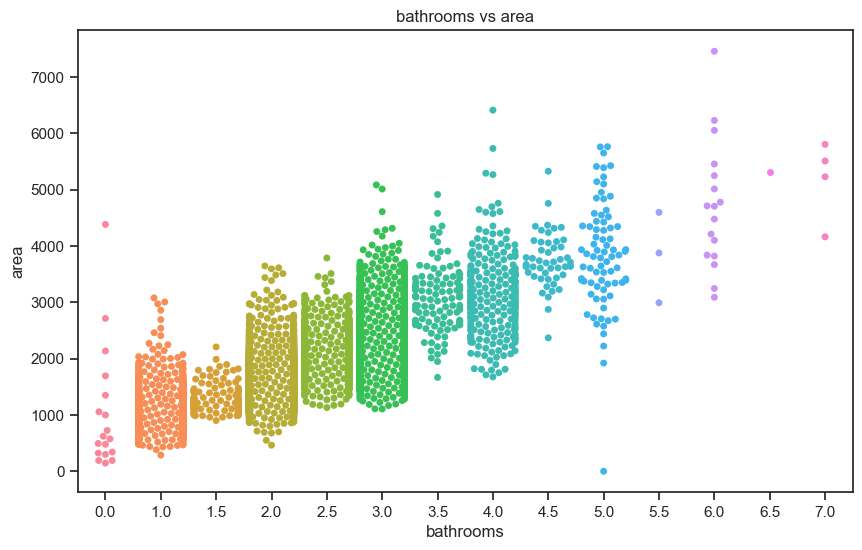

In [10]:
plot_categorical_and_continuous_vars(sm_df,'bathrooms','area')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_and_continuous_vars2(df, cat_var, cont_var, hue_var=None):
    # plot 1: boxplot
    fig, axs = plt.subplots(figsize=(10,6))
    sns.boxplot(x=cat_var, y=cont_var, hue=hue_var, data=df)
    axs.set_title(f"{cat_var} vs {cont_var}")
    axs.set_xlabel(cat_var)
    axs.set_ylabel(cont_var)
    plt.show()
    
    # plot 2: violinplot
    fig, axs = plt.subplots(figsize=(10,6))
    sns.violinplot(x=cat_var, y=cont_var, hue=hue_var, data=df)
    axs.set_title(f"{cat_var} vs {cont_var}")
    axs.set_xlabel(cat_var)
    axs.set_ylabel(cont_var)
    plt.show()
    
    # plot 3: swarmplot
    fig, axs = plt.subplots(figsize=(10,6))
    sns.swarmplot(x=cat_var, y=cont_var, hue=hue_var, data=df)
    axs.set_title(f"{cat_var} vs {cont_var}")
    axs.set_xlabel(cat_var)
    axs.set_ylabel(cont_var)
    plt.show()


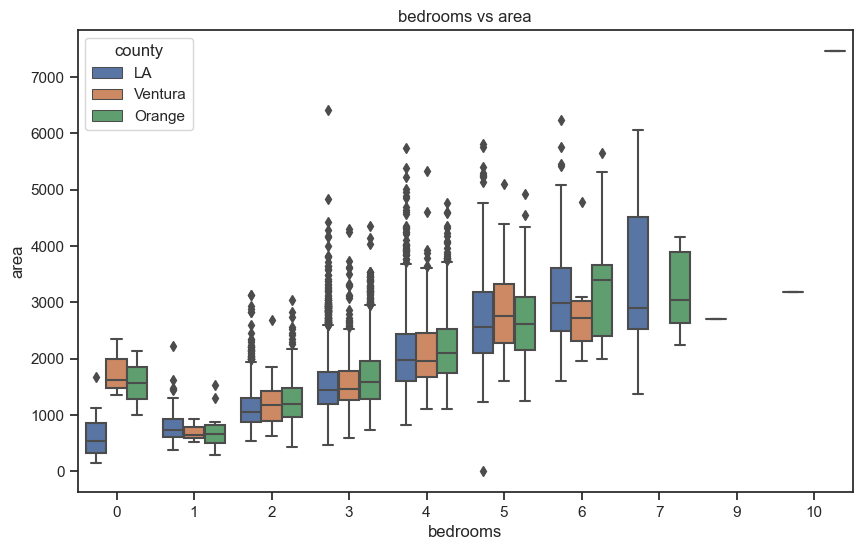

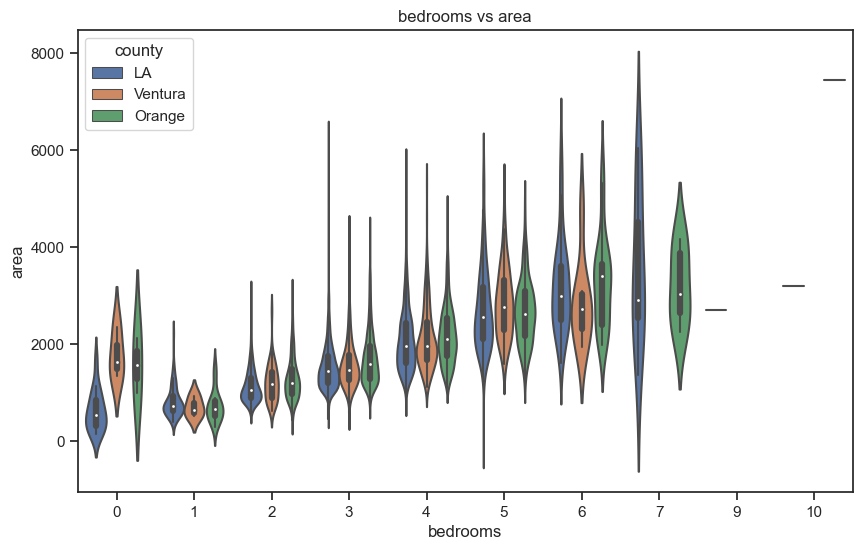

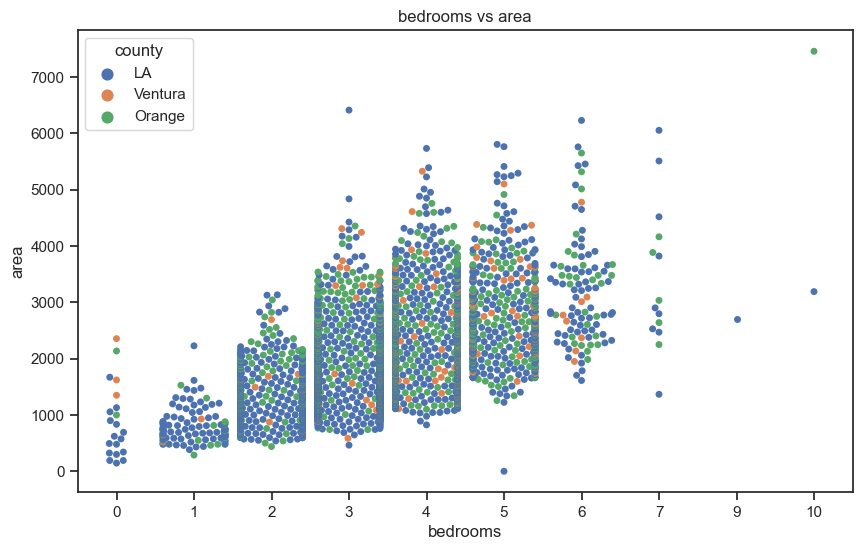

In [25]:
plot_categorical_and_continuous_vars2(sm_df, 'bedrooms', 'area', hue_var='county')

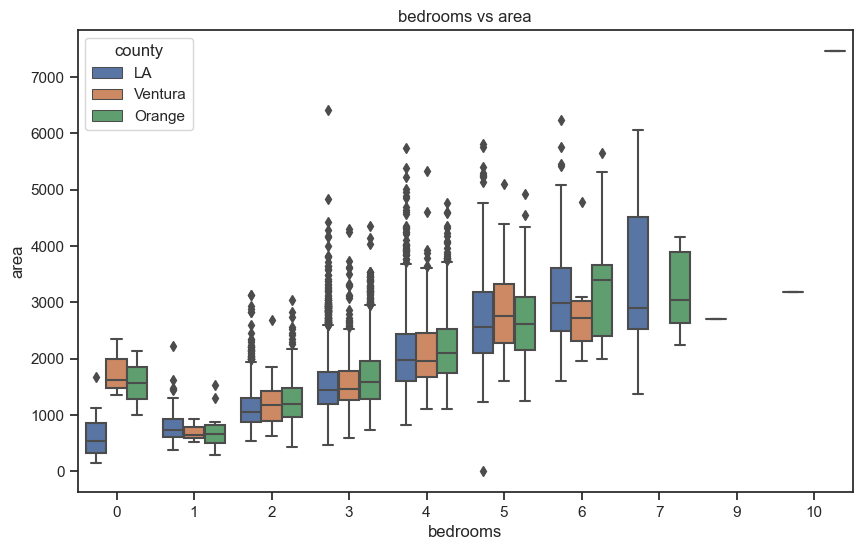

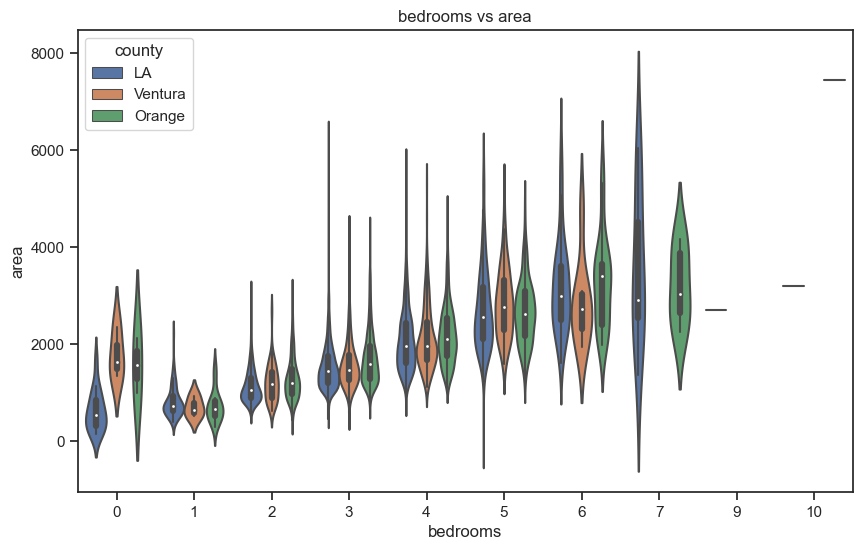

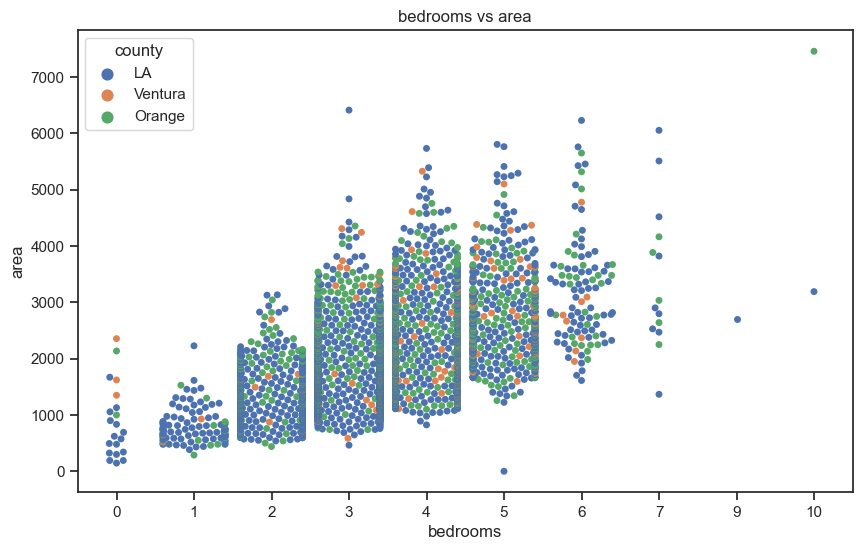

In [26]:
plot_categorical_and_continuous_vars2(sm_df, 'bedrooms', 'area', hue_var='county')

# 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.
 


In [14]:
explore.plot_variable_pairs(sm_df)

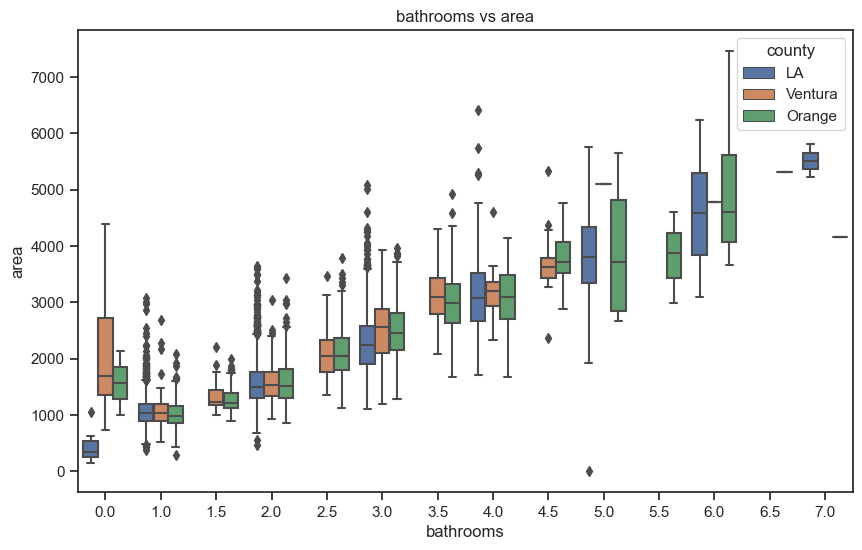

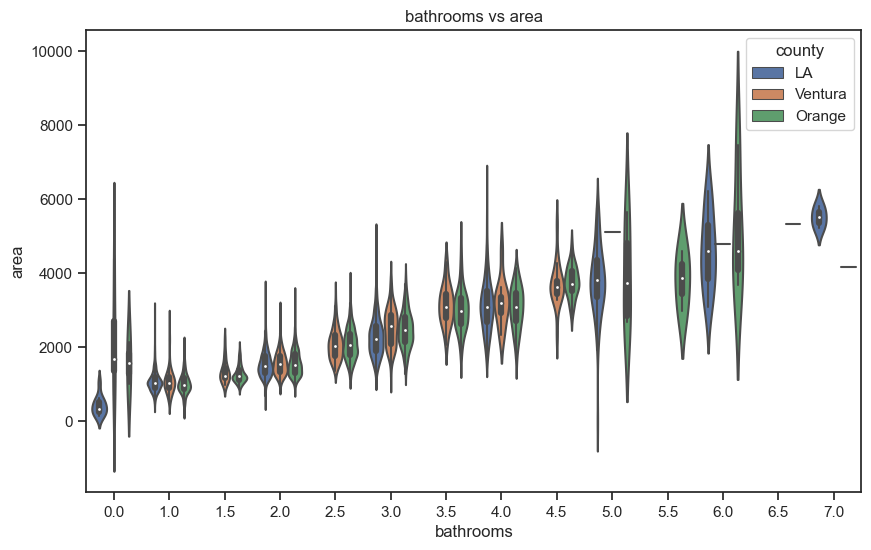

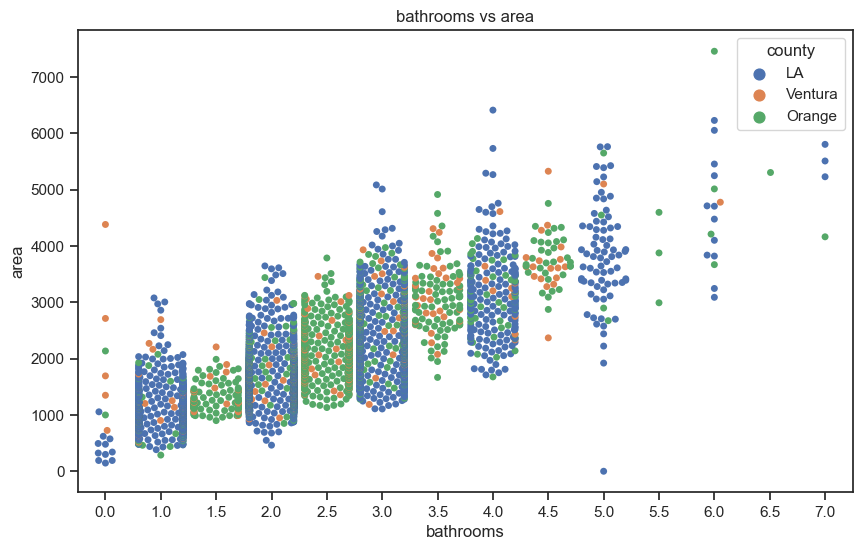

In [28]:
explore.plot_categorical_and_continuous_vars(sm_df,'bathrooms','area',hue_var='county')

# 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.
 


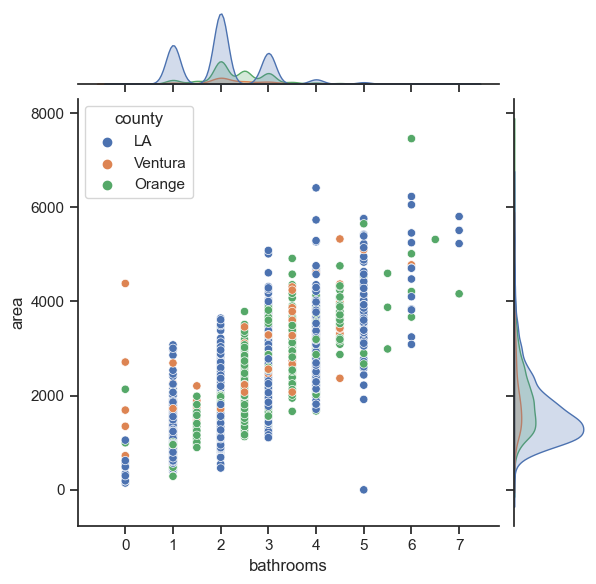

In [27]:
sns.jointplot(x="bathrooms", y="area",hue = 'county', data=sm_df, kind="scatter")
plt.show()

In [29]:
sm_df.county.value_counts()

LA         6646
Orange     2574
Ventura     780
Name: county, dtype: int64

In [32]:
sm_df

bedrooms  bathrooms  area  taxvalue  yearbuilt  taxamount   county
662794          2        1.0   980    522302       1955    5991.50       LA
1459121         3        2.0  1600    297116       1938    3645.70       LA
1082642         2        1.0  1040     67042       1964    1469.16       LA
59324           3        2.0  1588    422021       1924    5161.67       LA
2013330         3        2.0  1447    384362       1975    4504.42  Ventura
...           ...        ...   ...       ...        ...        ...      ...
36136           3        2.0  1564     37639       1948     801.71       LA
1835006         3        2.0  1112     41482       1950    1020.22       LA
215560          3        3.0  2563   1035884       1974   10906.08  Ventura
909015          3        2.0  1814    114104       1942    1732.85       LA
2702            3        2.0  1272    323032       1955    4267.85       LA

[10000 rows x 7 columns]

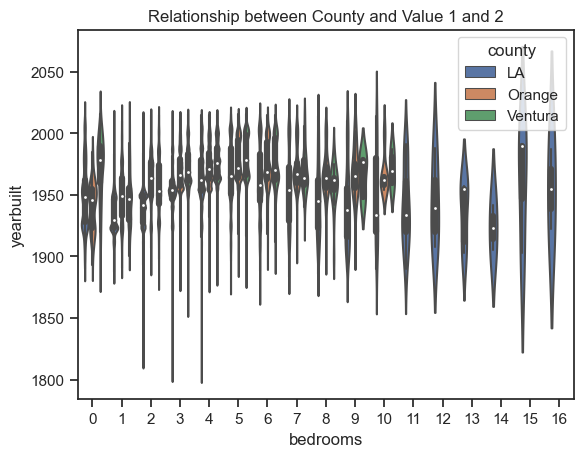

In [35]:
# create a grouped violin plot
sns.violinplot(x='bedrooms', y='yearbuilt', data=df, hue='county')
plt.title('Relationship between County and Value 1 and 2')
plt.show()


In [47]:
plt.scatter(data= sm_df,x='yearbuilt',y='bedrooms')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

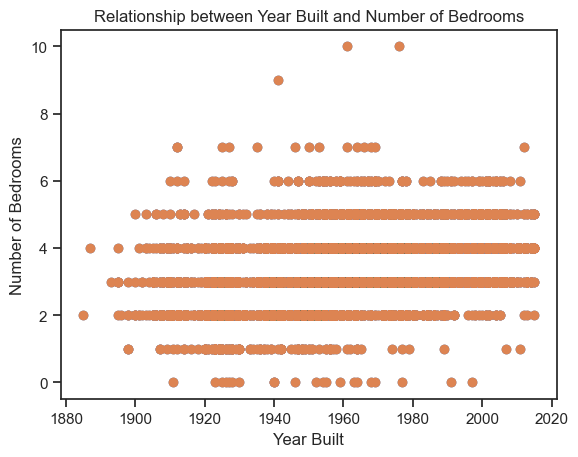

In [48]:
import matplotlib.pyplot as plt

# plot a scatter plot
plt.scatter(data=sm_df, x='yearbuilt', y='bedrooms')
plt.xlabel('Year Built')
plt.ylabel('Number of Bedrooms')
plt.title('Relationship between Year Built and Number of Bedrooms')
plt.show()


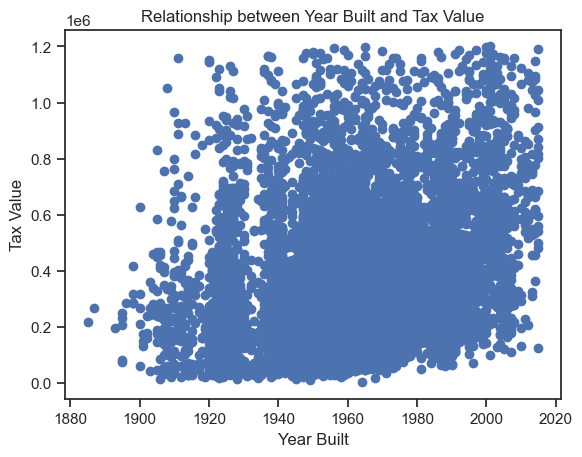

In [49]:
import matplotlib.pyplot as plt

# plot a scatter plot
plt.scatter(data=sm_df, x='yearbuilt', y='taxvalue')
plt.xlabel('Year Built')
plt.ylabel('Tax Value')
plt.title('Relationship between Year Built and Tax Value')
plt.show()


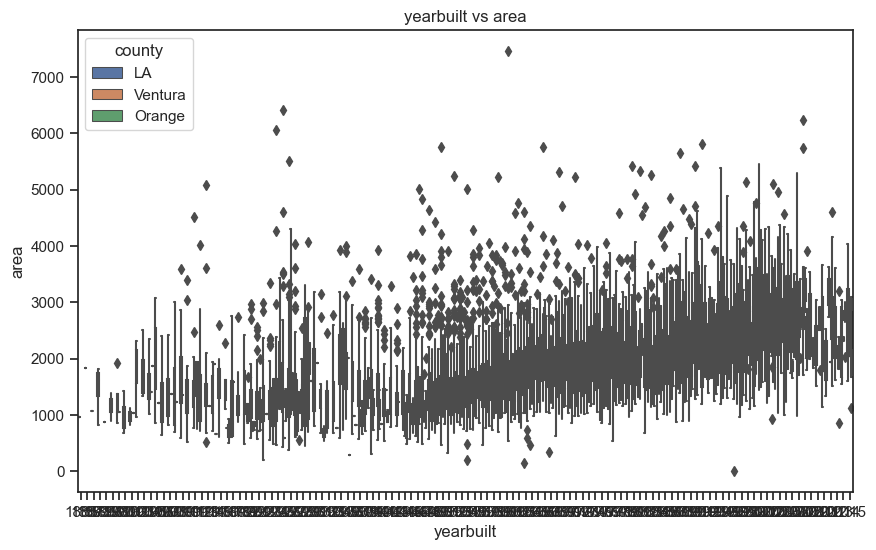

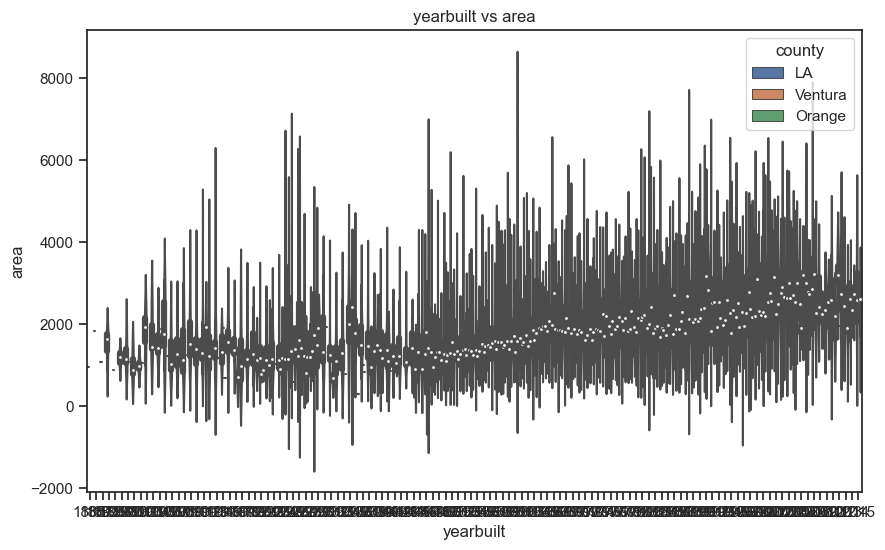

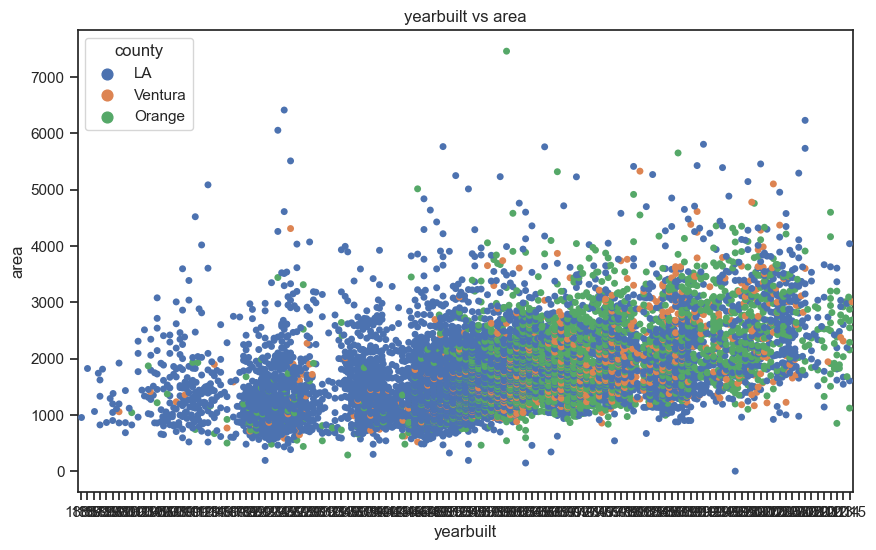

In [50]:
explore.plot_categorical_and_continuous_vars(sm_df,'yearbuilt','area',hue_var='county')

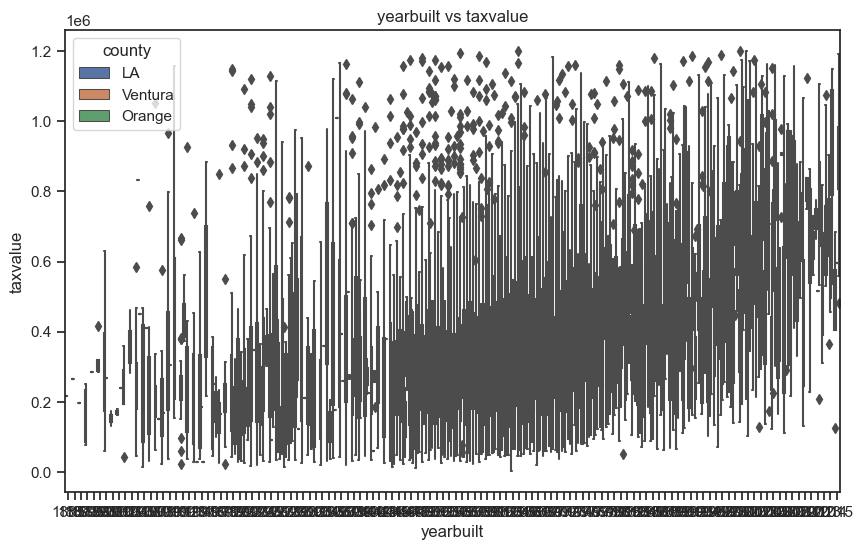

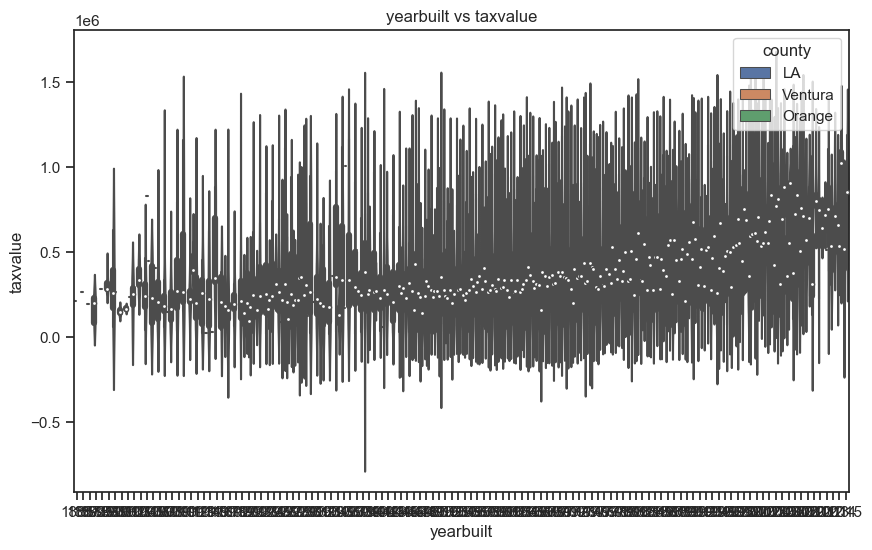

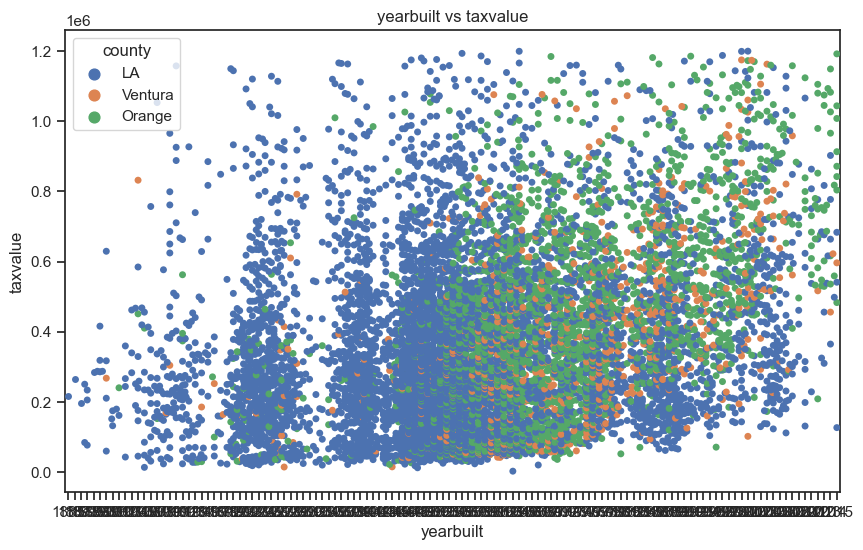

In [51]:
explore.plot_categorical_and_continuous_vars(sm_df,'yearbuilt','taxvalue',hue_var='county')

# 7. Come up with some initial hypotheses based on your goal of predicting property value.
 


$H_0$ The year built by county has no effect on value<br>
$H_a$The year built by county has an effect on value

# 8. Visualize all combinations of variables in some way.
 


In [54]:
explore.plot_variable_pairs(sm_df)

# 9. Run the appropriate statistical tests where needed.
 


In [59]:

from scipy.stats import spearmanr
import pandas as pd
alpha = .05
# load the data into a DataFrame
data = sm_df
# calculate the Spearman correlation coefficient and p-value
corr, p_value = spearmanr(data['yearbuilt'], data['taxvalue'])

# print the results
print(f"Spearman correlation coefficient: {corr:.2f}")
print(f"P-value: {p_value:.2f}")

Spearman correlation coefficient: 0.28
P-value: 0.00


# 10. What independent variables are correlated with the dependent variable, home value?
 


All the variables are correlated to some degree, but I will focus on yearbuilt and county

# 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?
 


number of bedrooms and yearbuilt
area and year built
beds/baths and area

# 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.
 


# 13. Explore your dataset with any other visualizations you think will be helpful.

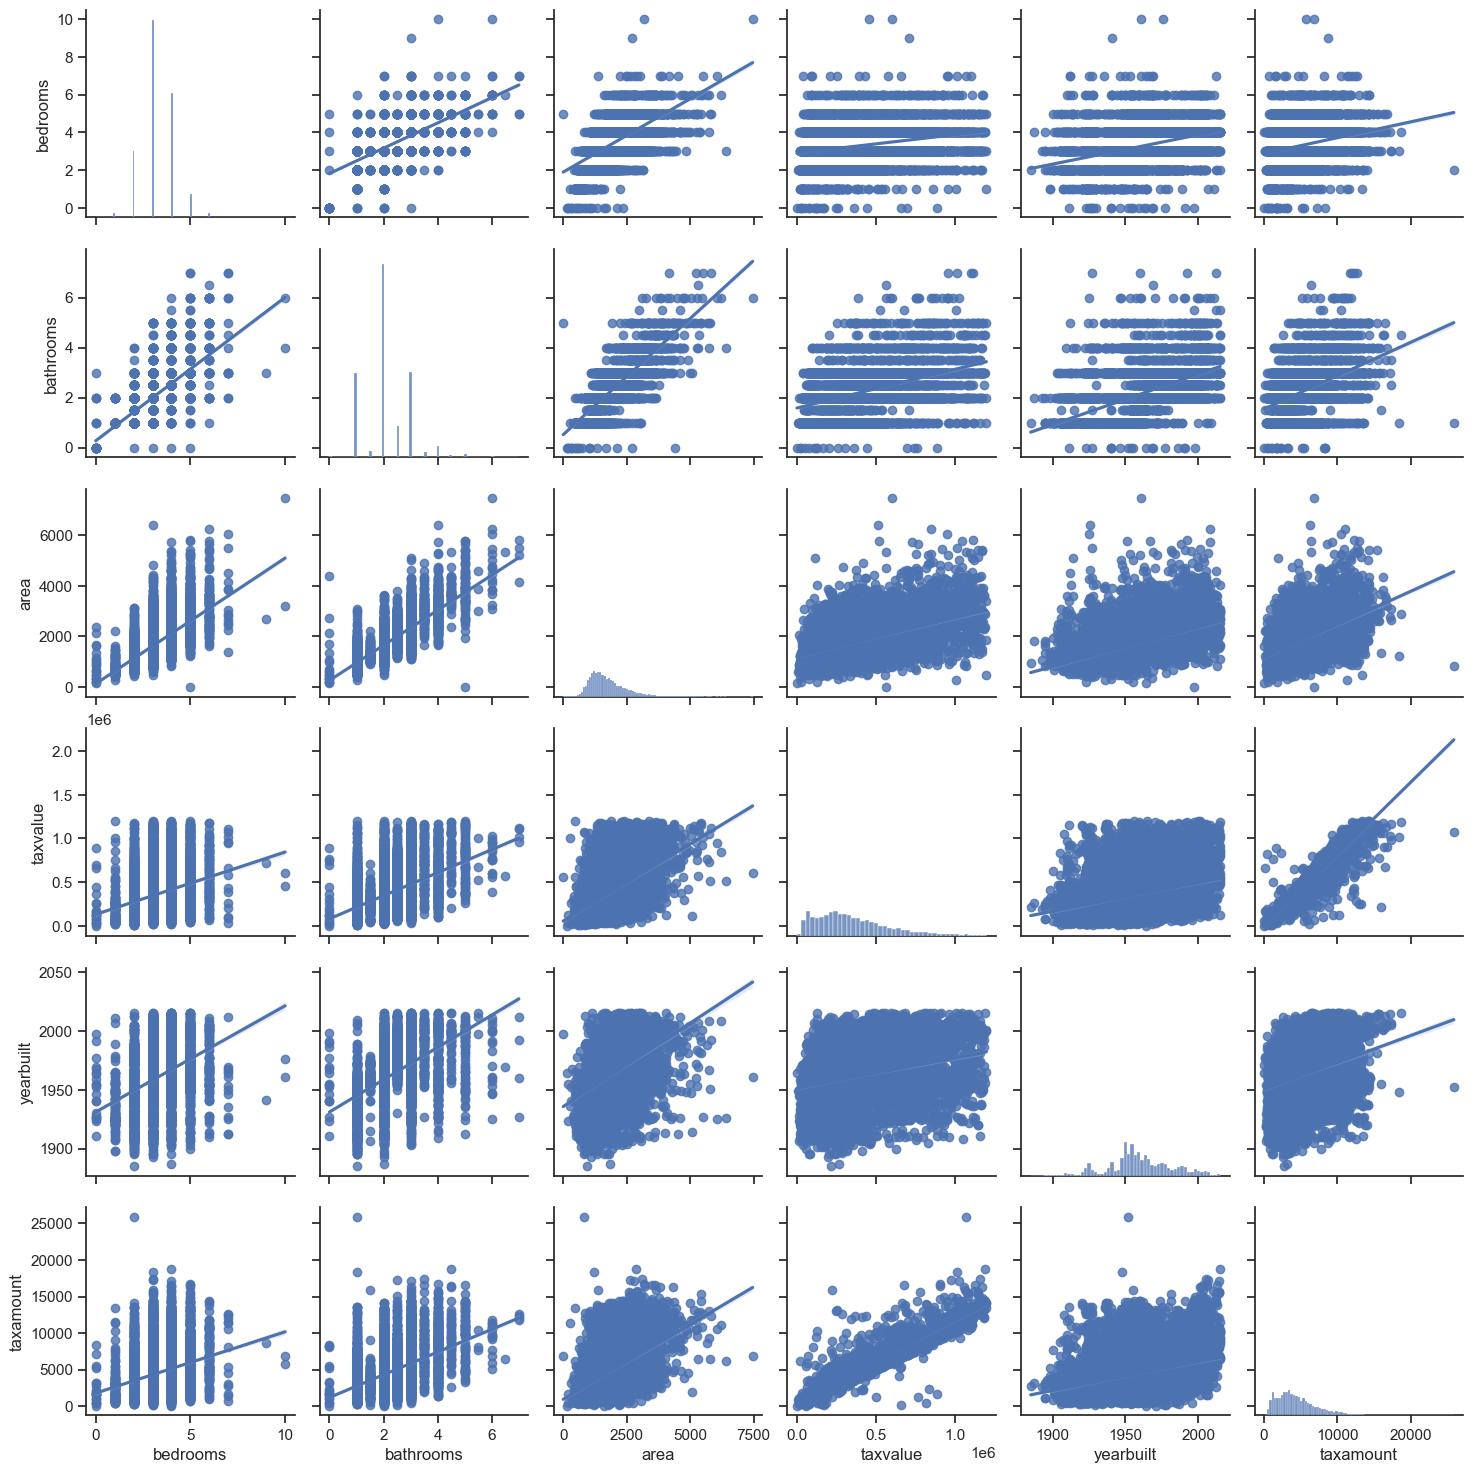

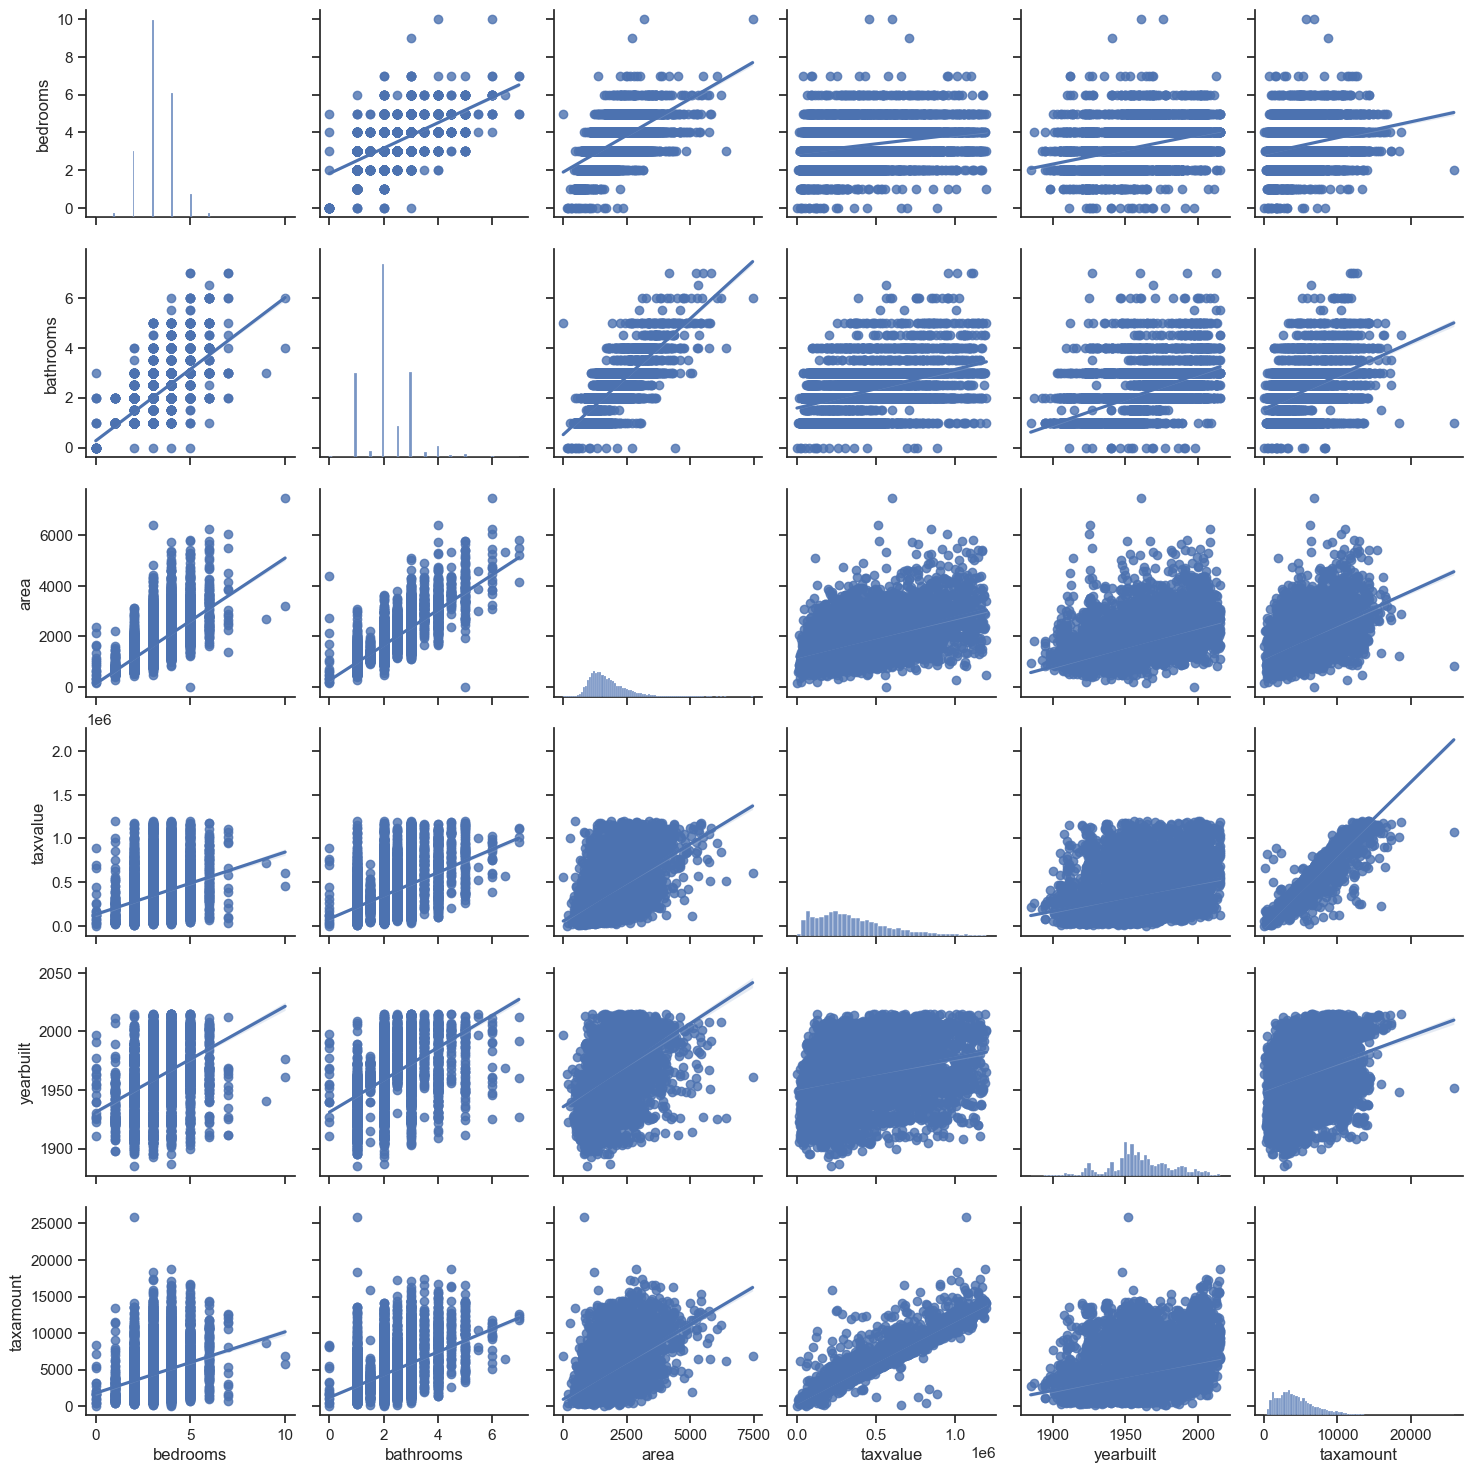

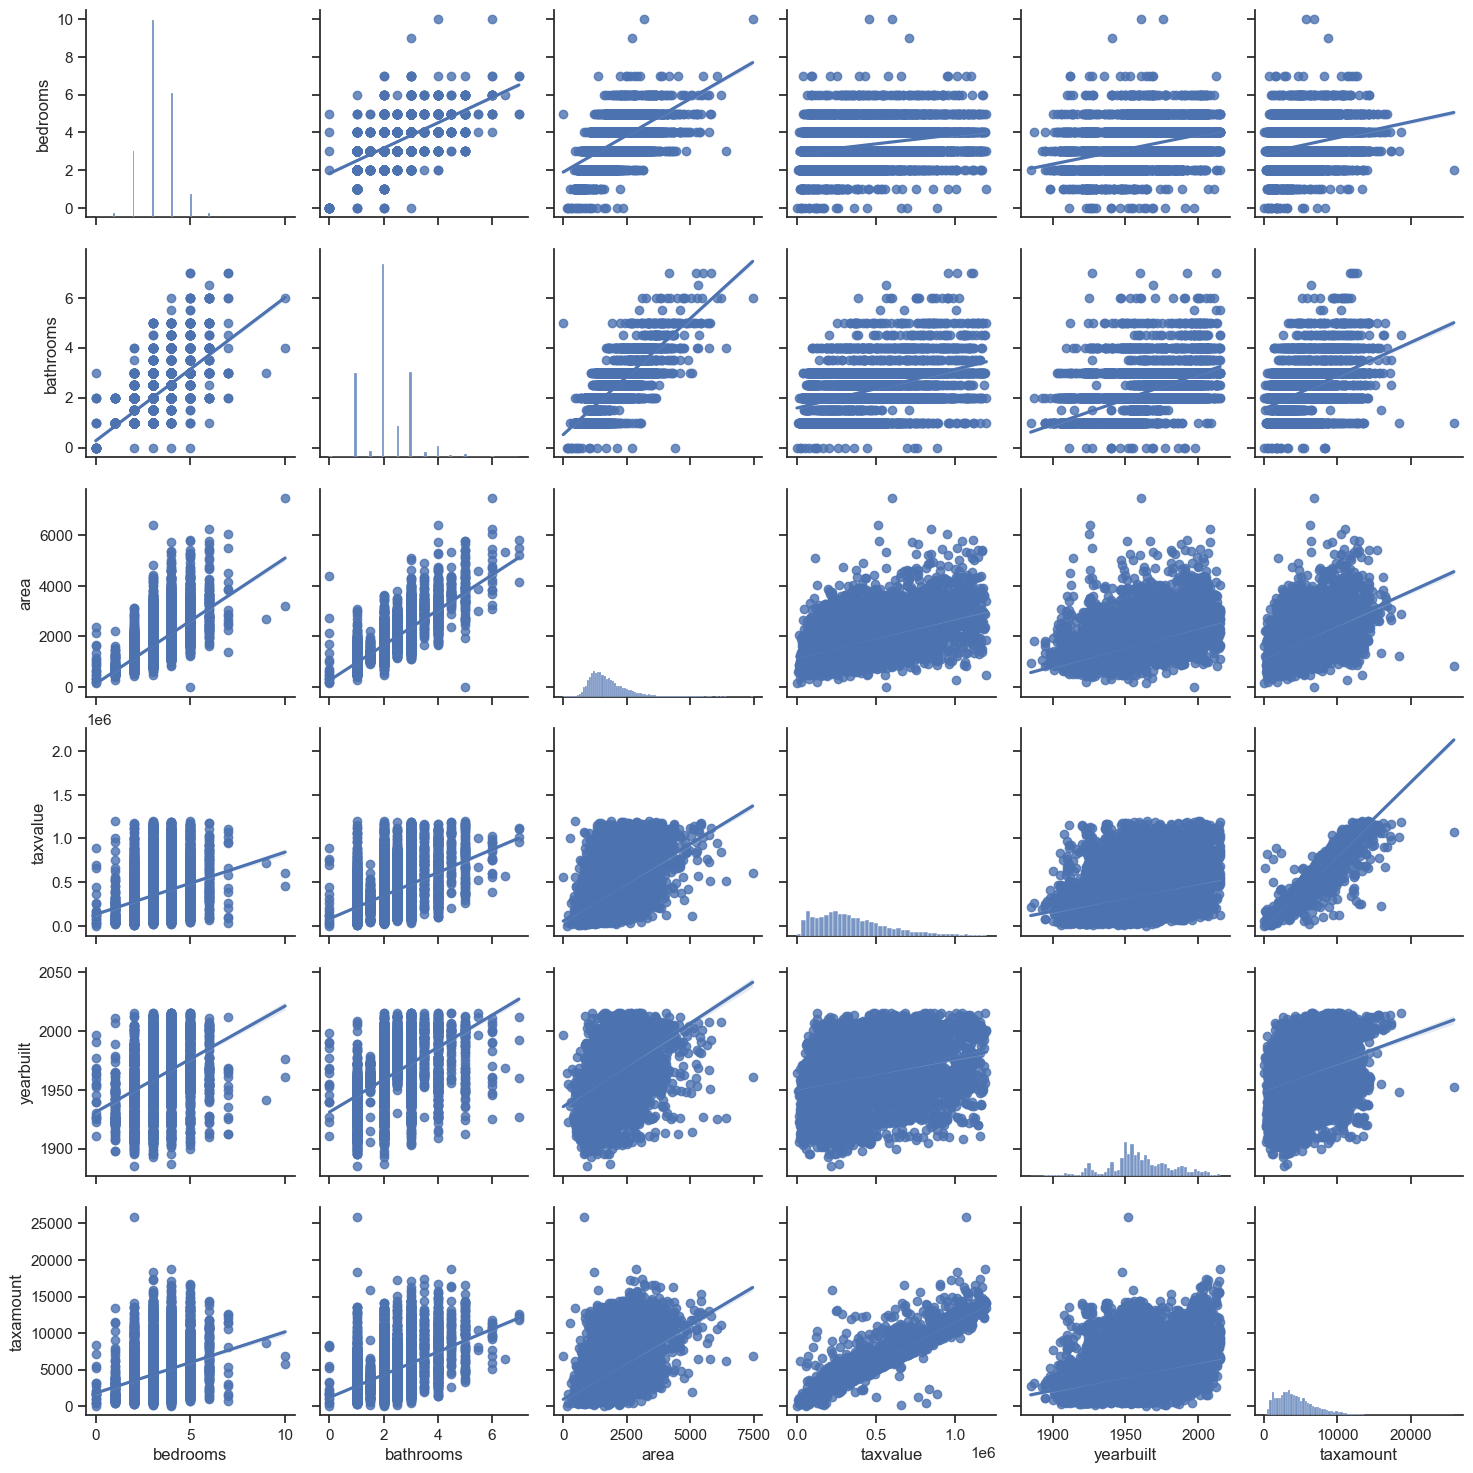

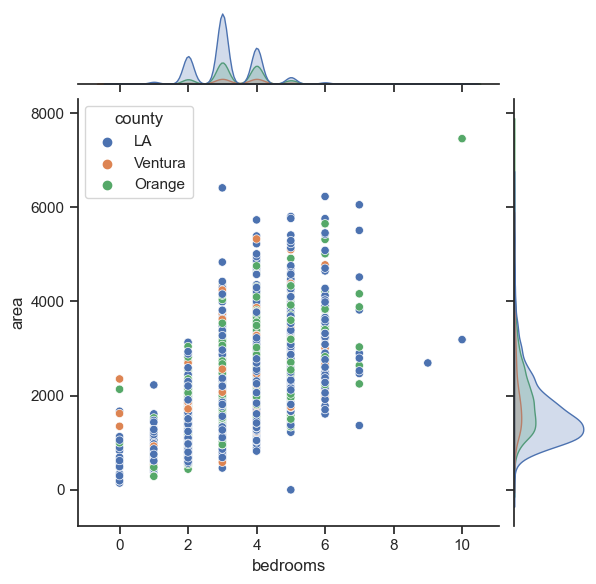

In [60]:
sns.jointplot(x="bedrooms", y="area",hue = 'county', data=sm_df, kind="scatter")
plt.show()

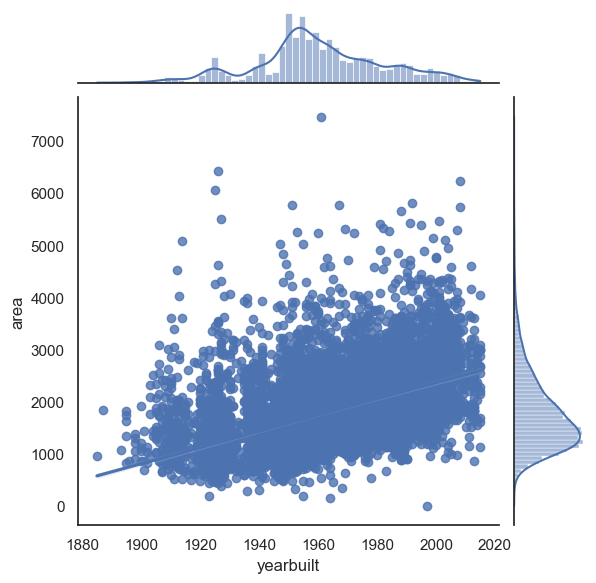

In [83]:
sns.jointplot(x="yearbuilt", y="area", data=sm_df, kind='reg', palette='rocket')
plt.show()

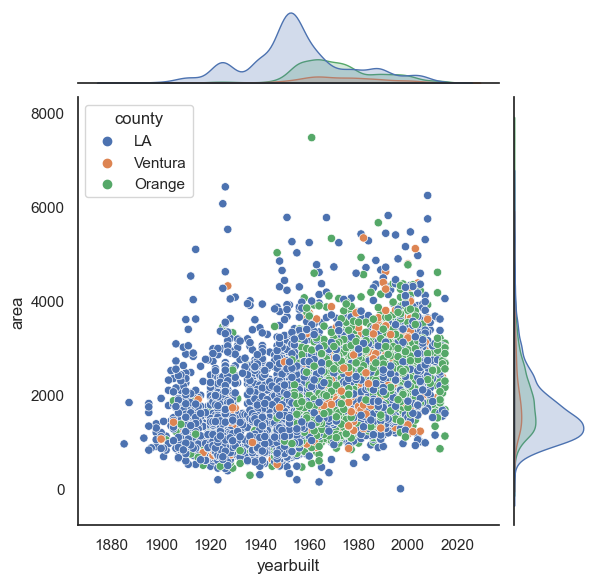

In [77]:
sns.jointplot(x="yearbuilt", y="area", hue='county',data=sm_df, kind='scatter')
plt.show()

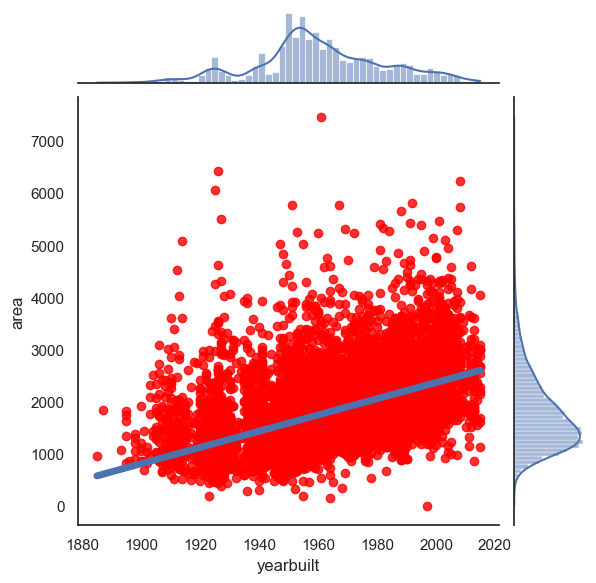

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Create the jointplot with scatter plot and regression line
g = sns.jointplot(x="yearbuilt", y="area", data=sm_df, kind='reg',line_kws={'linewidth': 5})

# Change the color of the regression line
g.ax_joint.collections[0].set_color('red')

# Show the plot
plt.show()
